#Project 4


##Part 1

###Q1

The research question from part 3:
Is gender, BMI, heart disease and heart rate effect on cholesterol level?

In [ ]:
import pandas as pd
import numpy as np
import random
from scipy import stats
import math
import matplotlib.pyplot as plt
import scipy

df = pd.read_csv("/content/framingham_heart_disease.csv")

#choose 200 samples randomly.
random.seed(1)
n_200 = random.sample(range(0,len(df)),200)
df_200= df.loc[n_200]

####A

In [ ]:
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS

#remove null values and take only wanted variables
tmp_200 = df_200[['male', 'BMI','TenYearCHD', 'heartRate','totChol']].dropna()

# linear regression on our 200 samples
x = tmp_200[['male', 'BMI','TenYearCHD', 'heartRate']]
x = sm.add_constant(x)
y = tmp_200['totChol']
model = OLS(y,x)
results = model.fit()


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
CI_0 , CI_1, CI_2, CI_3, CI_4 = dict(), dict(),dict(),dict(),dict() 

The CI using normal approximation: 

for $\beta_i : \hat{\beta_i} \pm Z_{\alpha/2}\cdot\hat{s.e(\hat{\beta_i})} $

$ \hat{s.e(\hat{\beta_i})} $ = $ \sqrt{\hat{\sigma_{\epsilon}^2} \cdot C_{i,i}} $

In [ ]:
data = x.to_numpy()
C = np.linalg.inv(np.matmul(data.T, data))
beta_hat = results.params #the beta for the 200 samples
def creat_ci (C, i):
  beta_name = ["const", "male", "BMI", "TenYearCHD", "heartRate"]
  var_hat = results.mse_resid * C[i][i]
  ci_a =  beta_hat[i] - stats.norm.ppf(0.975)* np.sqrt(var_hat)
  ci_b = beta_hat[i] + stats.norm.ppf(0.975)* np.sqrt(var_hat)
  print("The confidence interval for b",i,"-", beta_name[i], "is:")
  print([ci_a , ci_b])
  print("\n")
  mycode = "CI_{}[1]=[ci_a,ci_b]".format(i)
  exec(mycode)

for i in range(5):
  creat_ci(C, i)


The confidence interval for b 0 - const is:
[99.67066702605803, 201.40911674920198]


The confidence interval for b 1 - male is:
[-26.69426439584401, -3.2049045800707017]


The confidence interval for b 2 - BMI is:
[0.22951152022721266, 3.0146274667561137]


The confidence interval for b 3 - TenYearCHD is:
[-1.4314977092620556, 30.491280525466856]


The confidence interval for b 4 - heartRate is:
[0.21397973166044026, 1.1647044695901179]




####B


The CI using normal approximation: 

for $\beta_i : \hat{\beta_i} \pm Z_{\alpha/2}\cdot\hat{s.e_{boost}(\hat{\beta_i})} $

when $\hat{s.e}_{boost}(\hat{\beta_i}) = \sqrt{\frac{1}{400}\sum_{b=1}^{400}{\beta^{*b}_i}^2 - {(\frac{1}{400}\sum_{b=1}^{400}\beta^{*b}_i)}^2}$ 


In [ ]:
def calc_std(arr):
  return np.sqrt(sum(arr**2)/400 -(sum(arr)/400)**2)

In [ ]:
b_0 = []
b_1 = []
b_2 = []
b_3 = []
b_4 = []


for b in range(400):
  n_b = np.random.choice(n_200,200)
  df_b = df_200.loc[n_b]
  df_b = df_b[['male', 'BMI','TenYearCHD', 'heartRate','totChol']].dropna()
  data_b = df_b[['male', 'BMI','TenYearCHD', 'heartRate']].to_numpy()
  data_b = sm.add_constant(data_b)
  y_b = df_b['totChol']
  model_b = OLS(y_b,data_b)
  results_b = model_b.fit()
  beta_hat = results_b.params

  for i, b in enumerate([b_0, b_1, b_2, b_3, b_4]):
    b.append(beta_hat[i])

se_0_hat = calc_std(np.array(b_0))
se_1_hat = calc_std(np.array(b_1))
se_2_hat = calc_std(np.array(b_2))
se_3_hat = calc_std(np.array(b_3))
se_4_hat = calc_std(np.array(b_4))

param = results.params
for i, se in enumerate([se_0_hat, se_1_hat, se_2_hat, se_3_hat, se_4_hat]):
  a = param[i] - scipy.stats.norm.ppf(0.975)*se
  b = param[i] + scipy.stats.norm.ppf(0.975)*se
  print("CI for beta", i, "is:", [a,b] )
  print("\n")
  mycode = "CI_{}[2]=[a,b]".format(i)
  exec(mycode)

CI for beta 0 is: [96.90179021170815, 204.17799356355187]


CI for beta 1 is: [-26.144977851871918, -3.7541911240427908]


CI for beta 2 is: [0.06096434992817512, 3.1831746370551515]


CI for beta 3 is: [-0.10884368606183514, 29.168626502266637]


CI for beta 4 is: [0.15287125526255585, 1.2258129459880025]




####C + D

Pivot CI for $\beta_i$: $[2\hat{\beta_i} - \hat{\beta}^*_{i,1-\alpha/2}, 2\hat{\beta_i} - \hat{\beta}^*_{i,\alpha/2}]$

Precentil CI for $\beta_i$: $[  \hat{\beta}^*_{i,\alpha/2} ,  \hat{\beta}^*_{i,1-\alpha/2} ]$

In [ ]:
b_0 = []
b_1 = []
b_2 = []
b_3 = []
b_4 = []
beta_hat = results.params #the beta for the 200 samples

for b in range(400):
  n_b = np.random.choice(n_200,200)
  df_b = df_200.loc[n_b]
  df_b = df_b[['male', 'BMI','TenYearCHD', 'heartRate','totChol']].dropna()
  data_b = df_b[['male', 'BMI','TenYearCHD', 'heartRate']].to_numpy()
  data_b = sm.add_constant(data_b)
  y_b = df_b['totChol']
  model_b = OLS(y_b,data_b)
  results_b = model_b.fit()

  for i, beta in enumerate([b_0, b_1, b_2, b_3, b_4]):
    beta.append(results_b.params[i])

for i, beta in enumerate([b_0, b_1, b_2, b_3, b_4]):
  beta.sort()
  a_pivot = 2*beta_hat[i] - beta[389]
  b_pivot = 2*beta_hat[i] - beta[9]
  print("The pivot CI for beta", i, "is:", [a_pivot,b_pivot])
  print("\n")
  mycode = "CI_{}[3]=[a_pivot,b_pivot]".format(i)
  exec(mycode)
print("\n")

for i, beta in enumerate([b_0, b_1, b_2, b_3, b_4]):
  beta.sort()
  a_precent = beta[9]
  b_precent = beta[389]
  print("The precentil CI for beta", i, "is:", [a_precent, b_precent])
  print("\n")
  mycode = "CI_{}[4]=[a_precent,b_precent]".format(i)
  exec(mycode)




The pivot CI for beta 0 is: [104.0661682927612, 199.52947433906138]


The pivot CI for beta 1 is: [-25.764911185660537, -4.092395583403029]


The pivot CI for beta 2 is: [-0.27161784325866734, 3.1185059487396325]


The pivot CI for beta 3 is: [-2.1456268654902217, 30.107404284972965]


The pivot CI for beta 4 is: [0.21798573627896278, 1.2549746178561065]




The precentil CI for beta 0 is: [101.55030943619863, 197.0136154824988]


The precentil CI for beta 1 is: [-25.80677339251168, -4.1342577902541695]


The precentil CI for beta 2 is: [0.12563303824369398, 3.515756830241994]


The precentil CI for beta 3 is: [-1.0476214687681624, 31.205409681695023]


The precentil CI for beta 4 is: [0.12370958339445162, 1.1606984649715955]




###Q2

beta 0 is in the CI of section 1 in question 1
the length of the CI of section 1 in question 1 is:  101.73844972314396


beta 0 is in the CI of section 2 in question 1
the length of the CI of section 2 in question 1 is:  107.27620335184372


beta 0 is in the CI of section 3 in question 1
the length of the CI of section 3 in question 1 is:  95.46330604630018


beta 0 is in the CI of section 4 in question 1
the length of the CI of section 4 in question 1 is:  95.46330604630018




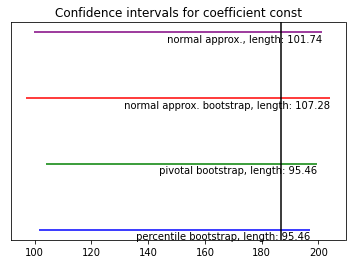

beta 1 is in the CI of section 1 in question 1
the length of the CI of section 1 in question 1 is:  23.489359815773305


beta 1 is in the CI of section 2 in question 1
the length of the CI of section 2 in question 1 is:  22.390786727829127


beta 1 is in the CI of section 3 in question 1
the length of the CI of section 3 in question 1 is:  21.67251560225751


beta 1 is in the CI of section 4 in question 1
the length of the CI of section 4 in question 1 is:  21.672515602257512




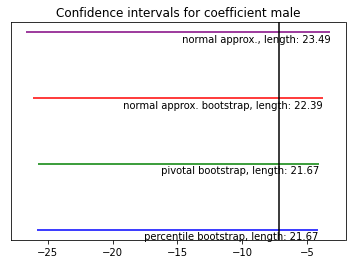

beta 2 is in the CI of section 1 in question 1
the length of the CI of section 1 in question 1 is:  2.785115946528901


beta 2 is in the CI of section 2 in question 1
the length of the CI of section 2 in question 1 is:  3.1222102871269763


beta 2 is in the CI of section 3 in question 1
the length of the CI of section 3 in question 1 is:  3.3901237919983


beta 2 is in the CI of section 4 in question 1
the length of the CI of section 4 in question 1 is:  3.3901237919983




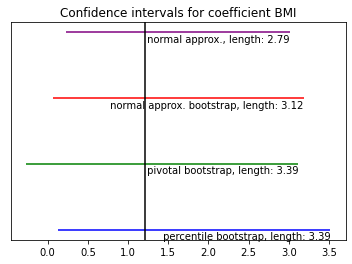

beta 3 is in the CI of section 1 in question 1
the length of the CI of section 1 in question 1 is:  31.92277823472891


beta 3 is in the CI of section 2 in question 1
the length of the CI of section 2 in question 1 is:  29.277470188328472


beta 3 is in the CI of section 3 in question 1
the length of the CI of section 3 in question 1 is:  32.25303115046319


beta 3 is in the CI of section 4 in question 1
the length of the CI of section 4 in question 1 is:  32.25303115046319




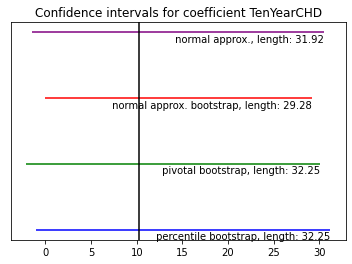

beta 4 is in the CI of section 1 in question 1
the length of the CI of section 1 in question 1 is:  0.9507247379296776


beta 4 is in the CI of section 2 in question 1
the length of the CI of section 2 in question 1 is:  1.0729416907254468


beta 4 is in the CI of section 3 in question 1
the length of the CI of section 3 in question 1 is:  1.0369888815771438


beta 4 is in the CI of section 4 in question 1
the length of the CI of section 4 in question 1 is:  1.0369888815771438




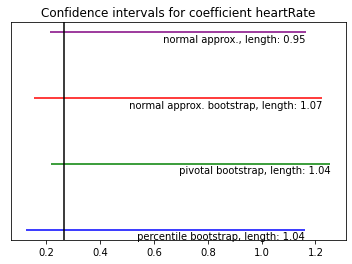

In [ ]:
tmp_full = df[['male', 'BMI','TenYearCHD', 'heartRate','totChol']].dropna() #all the data without missinf values
x_full = tmp_full[['male', 'BMI','TenYearCHD', 'heartRate']]
x_full = sm.add_constant(x_full)
y_full = tmp_full['totChol']
model_full = OLS(y_full,x_full)
results_full = model_full.fit()
beta_full = results_full.params
beta_name = ["const", "male", "BMI", "TenYearCHD", "heartRate"]

for i, CI in enumerate([CI_0, CI_1, CI_2, CI_3, CI_4]):
  for j in range(1,5):
    if beta_full[i] >= CI[j][0] and beta_full[i] <= CI[j][1]:
      print("beta",i, "is in the CI of section", j, "in question 1")
    else:
      print("beta",i, "is not in the CI of section", j, "in question 1")
    print("the length of the CI of section", j, "in question 1 is: ", abs(CI[j][1]-CI[j][0]))
    print("\n")


  xmin = [CI[4][0], CI[3][0] , CI[2][0],CI[1][0]]
  xmax = [CI[4][1], CI[3][1], CI[2][1], CI[1][1]]
  y = [0,1,2,3]
  x_labels = [ ' percentile bootstrap', ' pivotal bootstrap',' normal approx. bootstrap' ,' normal approx.'  ]
  for j,c in zip(y,['blue','green','red','purple']):
    plt.hlines(y=j, xmin=xmin[j], xmax=xmax[j], colors=c)
    plt.text(xmax[j], j-0.1, f'{x_labels[j]}, length: {round((xmax[j]-xmin[j]),2)}', color='black', ha='right', va='center')
  plt.axvline(beta_full[i], color = 'black')
  plt.title(f'Confidence intervals for coefficient {beta_name[i]}')
  plt.yticks([])
  plt.show()


As we can see all the $\beta_0 , \beta_1, \beta_2, \beta_3, \beta_4 $ are in the CI's.


We can see that the first 2 CI have very similar length. That seems logic because both relay on normal approximation. 

The other 2 CI also have exactly similar length. That seems logic because they relay on the same precemtile (we can also get that from the formula).

In general we can see that all of their length are very similar (for each beta). 




###Q3

####A

In [ ]:
test = df.drop(n_200) #all the data but the 200 samples
test = test.dropna()
test = test.sample(100) #choos 100 samples for the test
test_x = test[['male', 'BMI','TenYearCHD', 'heartRate']]
test_x= sm.add_constant(test_x)
test_y = test['totChol']
test_y_np = test_y.to_numpy()
np_test_x = test_x.to_numpy()
y_pred_200 = results.predict(np_test_x)
for i in range(len(np_test_x)):
  print("for sample", i, "predicted y is: ",y_pred_200[i] )

###B + C

In [ ]:
cnt =0
length = 0

for i in range(100):
  y_pred_new = []
  for b in range(400):
    n_b = np.random.choice(n_200,200)
    df_b = df_200.loc[n_b]
    df_b = df_b[['male', 'BMI','TenYearCHD', 'heartRate','totChol']].dropna()
    data_b = df_b[['male', 'BMI','TenYearCHD', 'heartRate']].to_numpy()
    data_b = sm.add_constant(data_b)
    y_b = df_b['totChol']
    model_b = OLS(y_b,data_b)
    results_b = model_b.fit()
    y_pred_new.append(results_b.predict(np_test_x[i])[0])

  se_i = calc_std(np.array(y_pred_new))
  a = y_pred_200[i] - stats.norm.ppf(0.975)*se_i
  b = y_pred_200[i] + stats.norm.ppf(0.975)*se_i

  print("the CI for E[Y|X] for sample precent",i ,"is: ", [a,b])
  if test_y_np[i] >= a and test_y_np[i] <= b :
    cnt +=1
  length += b-a
  

the CI for E[Y|X] for sample precent 0 is:  [227.85447488251253, 247.58698743376272]
the CI for E[Y|X] for sample precent 1 is:  [234.33070555929987, 261.11664945050336]
the CI for E[Y|X] for sample precent 2 is:  [226.23682210671615, 247.7130849577203]
the CI for E[Y|X] for sample precent 3 is:  [208.82860453224868, 243.28974451413706]
the CI for E[Y|X] for sample precent 4 is:  [235.8766914252831, 253.04934527494478]
the CI for E[Y|X] for sample precent 5 is:  [244.9637752982021, 275.6822381875569]
the CI for E[Y|X] for sample precent 6 is:  [212.35166357132834, 236.76998565009183]
the CI for E[Y|X] for sample precent 7 is:  [243.18143444722668, 265.90580303384223]
the CI for E[Y|X] for sample precent 8 is:  [212.75102526387298, 231.33680703003398]
the CI for E[Y|X] for sample precent 9 is:  [227.46668049853457, 256.02654642175656]
the CI for E[Y|X] for sample precent 10 is:  [231.29688265679647, 248.52941905316055]
the CI for E[Y|X] for sample precent 11 is:  [212.3512525947304, 231

In [ ]:
precent = cnt
length = length/100

print("the precent of CI that contains the real value is: ", precent,'%' )
print('the avarge length of the CI is: ', length)

the precent of CI that contains the real value is:  27 %
the avarge length of the CI is:  24.098707682937352


the avrage of residuals:  33.144015028436


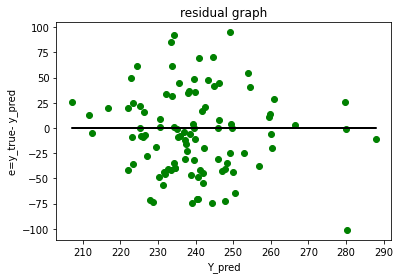

In [ ]:
e = [y_true- y_pred  for y_true, y_pred in zip(test_y_np, y_pred_200)]
e_abs = np.absolute(np.array(e))

avg_e = np.mean(e_abs)

plt.plot(y_pred_200, e, 'o', color='green')
plt.xlabel("Y_pred")
plt.ylabel("e=y_true- y_pred")
plt.plot(y_pred_200, np.zeros_like(e), color = 'black')
plt.title('residual graph')

print('the avrage of residuals: ', avg_e )



As we can see in the graph the avarge difference between the real value and the predicted value is around 31 and the avarge size of the CI is around 25. 
we built the CI according to normal approximation when calculating the se with bootstrap - with this method our predicted y according to the 200 samples is in the middle of the CI, and that's why most of the real value are not in the CI and that can explain why we got low precent.

###D

In order to calculate CI for $Y_{new}$ we can estimate the S.E by bootstrap algorithem. 

The only difference from CI of $E[Y_{new}|X_{new}]$ is that we need to add the variance of the noise. 

 In each iteration 1..B:

 (1) sample 200 samples from our 200-table. we marke $X^b$ as the matrix of the data in the b iteration. 
 
 (2) predict $Y_{NEW}^b $ acoording to $X^b$ (calculate the beta's $X^b$ samples)
 

calculate the S.E boost : $\hat{S.E_{boost}} = \sqrt{\hat{var}(Y_{new}|X_{new})+\hat{\sigma}_{\epsilon}^2}$ 

where $\hat{\sigma}_{\epsilon}^2$ is the estimator for the variance of the noise which is calculated by $\frac{SS_R}{n-p}$ on the original samples and $\hat{var}(Y_{new}|X_{new})$ is based on bootstrap.
 

 the CI is: $ \hat{Y_{new}} \pm Z_{\alpha/2}*S.E_{boost} $  


##Part 2

The research question from part 2 :

Does avarge heart rate changes between smokers and not smokers?



###Q1
The research question:

Dose the distribution of the avarge heart rate in smoker($X_1$) is larger(Stochastic dominance) then the  distribution of the avarge heart rate in non smoker($X_2$)


in terms of stochastic dominate: 

we will want to cheack if: $X_2  \prec X_1$

###Q2

In [ ]:
import pandas as pd
import numpy as np
import random
from scipy import stats
import math
import matplotlib.pyplot as plt
import scipy

df = pd.read_csv("/content/framingham_heart_disease.csv")

#choose 200 samples randomly.
random.seed(1)
n_200 = random.sample(range(0,len(df)),200)
df_200= df.loc[n_200]

###Q3



####A

notice - $\mu_1$ is for the non - smokers and $\mu_2$ is for smokers 

In [ ]:
df_new = df_200[["heartRate","currentSmoker"]]

#creat table for non smokers (0) and smokers (1)
df_new_0 = df_new.loc[df_new['currentSmoker']==0].dropna()
df_new_1 = df_new.loc[df_new['currentSmoker']==1].dropna()

#calculate the mean for each category
mean_0 =df_new_0["heartRate"].mean()
mean_1 =df_new_1["heartRate"].mean()

print("mean heart rate mean for non smokers (mu_1): " + str(mean_0))
print("mean heart rate mean for smokers (mu_2): " + str(mean_1))
print("delta hat is: ", str(mean_0-mean_1))


mean heart rate mean for non smokers (mu_1): 74.45360824742268
mean heart rate mean for smokers (mu_2): 75.99029126213593
delta hat is:  -1.5366830147132475


Text(0.5, 0, 'heart Rate')

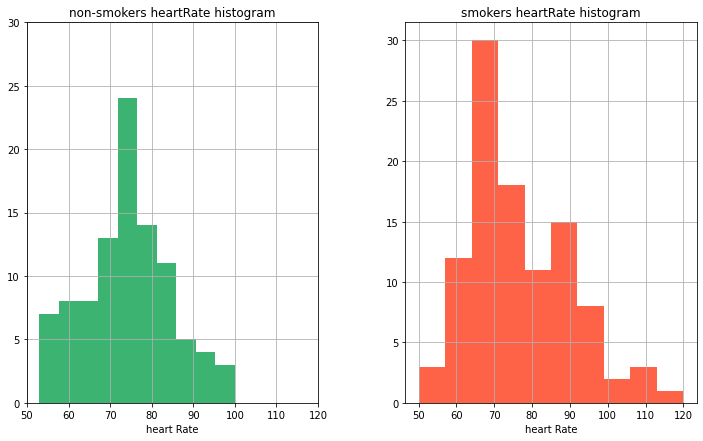

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (12,7))

df_new_0.hist('heartRate', ax=axes[0] ,color = 'mediumseagreen' )

df_new_1.hist('heartRate', ax=axes[1], color = 'tomato')
axes[0].set_title('non-smokers heartRate histogram')
axes[0].set_xlabel('heart Rate')
axes[0].set_xlim(50,120)
axes[0].set_ylim(0,30)

axes[1].set_title('smokers heartRate histogram')
axes[1].set_xlabel('heart Rate')

As we can see the heartRate of smokers and non-smokers is from normal distribution, so we assume normal dustribution model.

We will show that $\hat{\delta}$ is MLE:

$\bar{X_n^0} \approx N(\mu_1 , \frac{\sigma_1^2}{n})  $ 

$\bar{X_n^1} \approx N(\mu_2 , \frac{\sigma_2^2}{m})  $ 

we will define $\hat{\delta} = \bar{X_n^0}- \bar{X_n^1} \approx N(\delta = \mu_1-\mu_2, \frac{\sigma_1^2}{n}+\frac{\sigma_2^2}{m}) $

$ F(\delta)=L_n(\hat{\delta}) $

$ f(\delta) = log(F(\delta)) $

we will find $ \hat{\delta}^{MLE} $ By deriving the function $f(\delta) $ and Comparison to 0. 

And we will find out that $\hat{\delta} =\hat{\delta}^{MLE} $

in addition, MLE for $\mu$ is $\hat{\mu_1} - \hat{\mu_2} = \hat{\delta}$ from the equviariance property of MLE as $\hat{\mu_1}$ MLE for $\mu_1$ and $\hat{\mu_2}$ MLE for $\mu_2$ and they are seperable.


####B 

Because $\hat{\delta}$ is MLE, and $\mu_1, \mu_2$ are MLE : 
$\hat{\delta} \approx N(\bar{X_1} - \bar{X_2},\hat{{\sigma_1^2}/n} +\hat{\sigma_2^2}/m ) $

we will calculate the CI according to this

In [ ]:
var_0 = df_new_0["heartRate"].var() / len(df_new_0)
var_1 = df_new_1["heartRate"].var() / len(df_new_1)

std = np.sqrt(var_1 + var_0)
mean = mean_0 - mean_1

alpha = 0.05
quantile = stats.norm.ppf(1 - (alpha/2))

#calculate the confidence interval 
CI_delta = [mean - quantile*std , mean + quantile*std ]

print("the CI for delta is: ", CI_delta)


the CI for delta is:  [-4.877283019658409, 1.8039169902319143]


####C

In [ ]:
# we will calculte the mean for smokers and non smokers in 
df_full = df[["heartRate","currentSmoker"]]

#creat table for non smokers (0) and smokers (1)
df_full_0 = df_full.loc[df_full['currentSmoker']==0].dropna()
df_full_1 = df_full.loc[df_full['currentSmoker']==1].dropna()

#calculate the mean for each category
mean_0_full =df_full_0["heartRate"].mean()
mean_1_full =df_full_1["heartRate"].mean()

print("delta is: ", str(mean_0_full-mean_1_full))


delta is:  -1.499780718956572


as we can see the delta value is the CI we calculate before. 

####D

Vald Test:

$H_0 : \mu_1 - \mu_2 \le 0 $

$ H_1: \mu_1 - \mu_2 > 0 $

$
T = \frac{\bar{X}1 - \bar{X}_2}{\sqrt{\frac{S{X_1}^2}
{n_1}+\frac{S_{X_2}^2}{n_2}}}
$

Reject if $ T > z_{1-\alpha }$

In [ ]:
#calculate vald test
alpha = 0.05
quantile = stats.norm.ppf((1-alpha)) 

sp = np.sqrt(var_0 + var_1)
T_vald = mean/ sp

if T_vald > quantile:
  print("reject H_0")
else:
  print ("don't reject H_0")

print("Ts: " + str(T_vald))

don't reject H_0
Ts: -0.9015875471573678


In [ ]:
#creat dict: {heartRate : #it apears in the 200 smaples}
df = df_200['heartRate'].nunique()
heartRate = sorted(list(df_200['heartRate']))
heartRate_dict = dict()

for item in heartRate:
  if item in heartRate_dict.keys():
    heartRate_dict[item] +=1
  else:
    heartRate_dict[item] =1


$H_0 : F_{X_1} = F_{X_2} $

$H_1 : F_{X_2} \prec F_{X_1}$

$T^{obs} = \bar{X_1}-\bar{X_2}$

In [ ]:
#permutation test
delta = mean_0 - mean_1 
cnt = 0

permute_df =  df_200[["heartRate","currentSmoker"]].dropna()
permute_df = permute_df.copy()

for b in range(400):
  permute_smokers = list(permute_df['currentSmoker'])
  np.random.shuffle(permute_smokers)
  permute_df['currentSmoker'] = permute_smokers
  df_b_0 = permute_df.loc[permute_df['currentSmoker']==0]
  df_b_1 = permute_df.loc[permute_df['currentSmoker']==1]

  # calculate the mean for each category
  mean_0_b =df_b_0["heartRate"].mean()
  mean_1_b =df_b_1["heartRate"].mean()
  delta_b = mean_0_b- mean_1_b 
  if delta_b >= delta:
    cnt +=1

pvalue = cnt/400

if pvalue > 0.05:
  print("don't reject H_0")    
else:
  print("reject H_0")

print('the pvalue is:', pvalue )

don't reject H_0
the pvalue is: 0.82


###Q4

####A

In [ ]:
median_0 =df_new_0["heartRate"].median()
median_1 =df_new_1["heartRate"].median()

print("mean heart rate mean for non smokers: " + str(median_0))
print("mean heart rate mean for smokers: " + str(median_1))
print("delta hat is: ", str(median_0- median_1))


mean heart rate mean for non smokers: 75.0
mean heart rate mean for smokers: 73.0
delta hat is:  2.0


As we saw in Q3 section A - the assumption of Normal distribution holds. In symnetrical distribution, the median is equal to the mean. therfore as we know the MLE for the median is suppose to be equal the the MLE of the mean and as we know the MLE is the average. **Therefore the median is not MLE**.

####B

In [ ]:
#bootstrap pivot CI
delta_arr = [] 
for b in range(400):
  n_b = np.random.choice(n_200,200)
  df_b = df_200.loc[n_b]
  df_b = df_b[["heartRate","currentSmoker"]]
  df_b_0 = df_b.loc[df_b['currentSmoker']==0].dropna()
  df_b_1 = df_b.loc[df_b['currentSmoker']==1].dropna()

  #calculate the mean for each category
  median_0_b =df_b_0["heartRate"].median()
  median_1_b =df_b_1["heartRate"].median()
  delta_arr.append( median_0_b- median_1_b)

delta_arr.sort()
a = delta_arr[10]
b = delta_arr[389]

print("CI for delta: ", [a,b])

CI for delta:  [-3.0, 5.0]


####C

In [ ]:
median_0_full =df_full_0["heartRate"].median()
median_1_full =df_full_1["heartRate"].median()

print("delta is: ", str(median_1_full- median_0_full))

delta is:  0.0


as we can see the delta value is in the CI we calculate before.

####D

$H_0 : F_{X_1} = F_{X_2} $

$H_1 : F_{X_2} \prec F_{X_1}$

$T^{obs} = median_{X_1}-median_{X_2}$

In [ ]:
#permutation test

delta_median = median_0 - median_1
cnt = 0
permute_df =  df_200[["heartRate","currentSmoker"]].dropna()
permute_df = permute_df.copy()

for b in range(400):
  permute_smokers = list(permute_df['currentSmoker'])
  np.random.shuffle(permute_smokers)
  permute_df['currentSmoker'] = permute_smokers
  df_b_0 = permute_df.loc[permute_df['currentSmoker']==0]
  df_b_1 = permute_df.loc[permute_df['currentSmoker']==1]

  # calculate the mean for each category
  median_0_b =df_b_0["heartRate"].median()
  median_1_b =df_b_1["heartRate"].median()
  delta_b_median = median_0_b- median_1_b
  if delta_b_median >= delta_median:
    cnt +=1

pvalue_med = cnt/400

if pvalue_med > 0.05:
  print("don't reject H_0")    
else:
  print("reject H_0")

print('the pvalue is:', pvalue_med )

don't reject H_0
the pvalue is: 0.185


####E

As we learned in class the **T test** is for difference between means and not for difference between medians. therfore we cannot do T test for this case.

As we learned in class **Wald test** is based on statistic that is asymptotically normal distributed.  It can be shown that the median in asymptotically normal distributed so we can use Wald test.

###Q5

$H_0 : F_{X_1} = F_{X_2} $

$H_1 : F_{X_2} \prec F_{X_1}$

$W_S^{obs} = \sum_{i=i}^n S_i$

In [ ]:
print("dict for all the values we have and how much we have of each:", heartRate_dict)

dict for all the values we have and how much we have of each: {50.0: 2, 53.0: 1, 54.0: 2, 55.0: 3, 56.0: 2, 60.0: 10, 62.0: 8, 63.0: 3, 64.0: 3, 65.0: 13, 66.0: 4, 67.0: 3, 68.0: 7, 69.0: 2, 70.0: 18, 72.0: 10, 73.0: 3, 74.0: 3, 75.0: 23, 76.0: 2, 77.0: 1, 78.0: 4, 79.0: 1, 80.0: 20, 82.0: 2, 84.0: 1, 85.0: 16, 86.0: 3, 87.0: 1, 88.0: 4, 90.0: 4, 92.0: 3, 94.0: 1, 95.0: 4, 96.0: 3, 98.0: 3, 100.0: 3, 107.0: 1, 110.0: 2, 120.0: 1}


as we can see we have a lot of ties values so we need to consider them, and because we have ties we can not use the normal approximation - because now the permutation does not come from uniform ditribution and the symmetry does not hold anymore.
therefore, we will use sampling instead.



In [ ]:
def calc_degree(df):
  ST_b = 0
  heartRate_dict = dict()
  heartRate_degree = dict()

# dict that says:{ heartRate : #times it appears}
  for index, row in df.iterrows():
    if row['heartRate'] in heartRate_dict.keys():
      heartRate_dict[row['heartRate']] +=1
    else:
      heartRate_dict[row['heartRate']] =1
  heartRate_list = list(df['heartRate'])  

# dict that says:{ heartRate : its degree}

  for idx, item in enumerate(heartRate_list):
    if heartRate_dict[item] == 1:
      heartRate_degree[item] = idx+1
    else:
      if item not in heartRate_degree.keys():
        idx_end = idx + heartRate_dict[item]
        heartRate_degree[item] = (idx + 1 +idx_end)/2
        
# TS for the current data (the degree of all the smokers)
  for index, row in df.iterrows():
    if row['currentSmoker'] ==0 :
      ST_b += heartRate_degree[row['heartRate']]
  return ST_b

  

In [ ]:
TS = calc_degree(df_200.sort_values('heartRate')) 
TS_B = [] 

cnt = 0
permute_df =  df_200[["heartRate","currentSmoker"]].dropna()
permute_df = permute_df.copy()


for b in range(400):
  permute_smokers = list(permute_df['currentSmoker'])
  np.random.shuffle(permute_smokers)
  permute_df['currentSmoker'] = permute_smokers
  permute_df = permute_df[["heartRate","currentSmoker"]].sort_values('heartRate')
  TS_B.append(calc_degree(permute_df))

cnt = 0
for ts in TS_B:
  if ts >= TS:
    cnt+=1

pvalue_permute = cnt/400

if pvalue_permute > 0.05:
  print("don't reject H_0")    
else:
  print("reject H_0")

print('the pvalue is:', pvalue_permute )

don't reject H_0
the pvalue is: 0.5775
